In [1]:
import pandas as pd
import numpy as np
import os
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df

,bathrooms,bedrooms,sqft,garages,fips,lot_size,year,tax_value,transactiondate,logerror,fips_6037,fips_6059,fips_6111,bed_bath,lot_minus_home
0,2.0,4,3633.0,2.0,6037,9826.0,2005,296425.0,2017-01-02,0.042463,1,0,0,6.0,6193.0
1,2.0,3,2077.0,2.0,6037,6490.0,1926,646760.0,2017-01-02,-0.040807,1,0,0,5.0,4413.0
2,1.0,3,1244.0,2.0,6037,6021.0,1950,169471.0,2017-01-03,0.042412,1,0,0,4.0,4777.0
3,2.0,3,1300.0,2.0,6037,4917.0,1950,233266.0,2017-01-03,-0.000908,1,0,0,5.0,3617.0
4,2.0,3,1222.0,2.0,6037,5500.0,1951,290492.0,2017-01-03,-0.316484,1,0,0,5.0,4278.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55353,2.0,2,1362.0,2.0,6037,6854.0,1996,127276.0,2017-09-19,0.001082,1,0,0,4.0,5492.0
55354,2.0,3,1600.0,2.0,6037,6709.0,1992,180715.0,2017-09-20,-0.002245,1,0,0,5.0,5109.0
55355,3.0,4,1921.0,2.0,6037,6763.0,1990,162019.0,2017-09-20,0.020615,1,0,0,7.0,4842.0
55356,3.0,4,1780.0,2.0,6037,6822.0,1989,125923.0,2017-09-21,0.013209,1,0,0,7.0,5042.0


In [4]:
df.describe()

,bathrooms,bedrooms,sqft,garages,fips,lot_size,year,tax_value,logerror,fips_6037,fips_6059,fips_6111,bed_bath,lot_minus_home
count,35958.000000,35958.000000,35958.000000,35958.000000,35958.000000,35958.000000,35958.000000,35958.000000,35958.000000,35958.000000,35958.000000,35958.000000,35958.000000,35958.000000
mean,2.060724,3.215946,1640.907336,1.951777,6048.945881,6640.958090,1960.045247,338432.825463,0.016674,0.661633,0.251794,0.086573,5.276670,5000.050754
std,0.700511,0.791502,555.173312,0.249280,21.289708,1901.465666,20.545473,150048.610596,0.172982,0.473161,0.434049,0.281213,1.328373,1833.254903
min,1.000000,1.000000,702.000000,0.000000,6037.000000,1010.000000,1900.000000,100002.000000,-4.655420,0.000000,0.000000,0.000000,2.000000,-1007.000000
25%,2.000000,3.000000,1232.000000,2.000000,6037.000000,5504.000000,1949.000000,217536.500000,-0.024456,0.000000,0.000000,0.000000,4.500000,3964.000000
50%,2.000000,3.000000,1540.000000,2.000000,6037.000000,6500.000000,1957.000000,316956.500000,0.006709,1.000000,0.000000,0.000000,5.000000,4939.000000
75%,2.500000,4.000000,1948.000000,2.000000,6059.000000,7622.000000,1973.000000,444500.250000,0.039193,1.000000,1.000000,0.000000,6.000000,6033.000000
max,4.500000,5.000000,5634.000000,7.000000,6111.000000,11999.000000,2015.000000,699799.000000,5.262999,1.000000,1.000000,1.000000,9.500000,11099.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35958 entries, 0 to 55357
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        35958 non-null  float64
 1   bedrooms         35958 non-null  int64  
 2   sqft             35958 non-null  float64
 3   garages          35958 non-null  float64
 4   fips             35958 non-null  int64  
 5   lot_size         35958 non-null  float64
 6   year             35958 non-null  int64  
 7   tax_value        35958 non-null  float64
 8   transactiondate  35958 non-null  object 
 9   logerror         35958 non-null  float64
 10  fips_6037        35958 non-null  uint8  
 11  fips_6059        35958 non-null  uint8  
 12  fips_6111        35958 non-null  uint8  
 13  bed_bath         35958 non-null  float64
 14  lot_minus_home   35958 non-null  float64
dtypes: float64(8), int64(3), object(1), uint8(3)
memory usage: 3.7+ MB


In [6]:
def plot_variable_hist(df):
    '''This function takes in a dataframe and returns a histogram for each variable.'''
    plt.figure(figsize=(24, 20))

    # List of columns
    cols = ['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'lot_size', 'year', 'fips']
    for i, col in enumerate(cols):
        # i starts at 0, but plot nos should start at 1
        subplot_num = i+1
        # Create subplot.
        plt.subplot(5,2,subplot_num)
        # Title with column name.
        plt.title(col)
        # Display histogram for column.
        df[col].hist()
        # Hide gridlines.
        plt.grid(False)

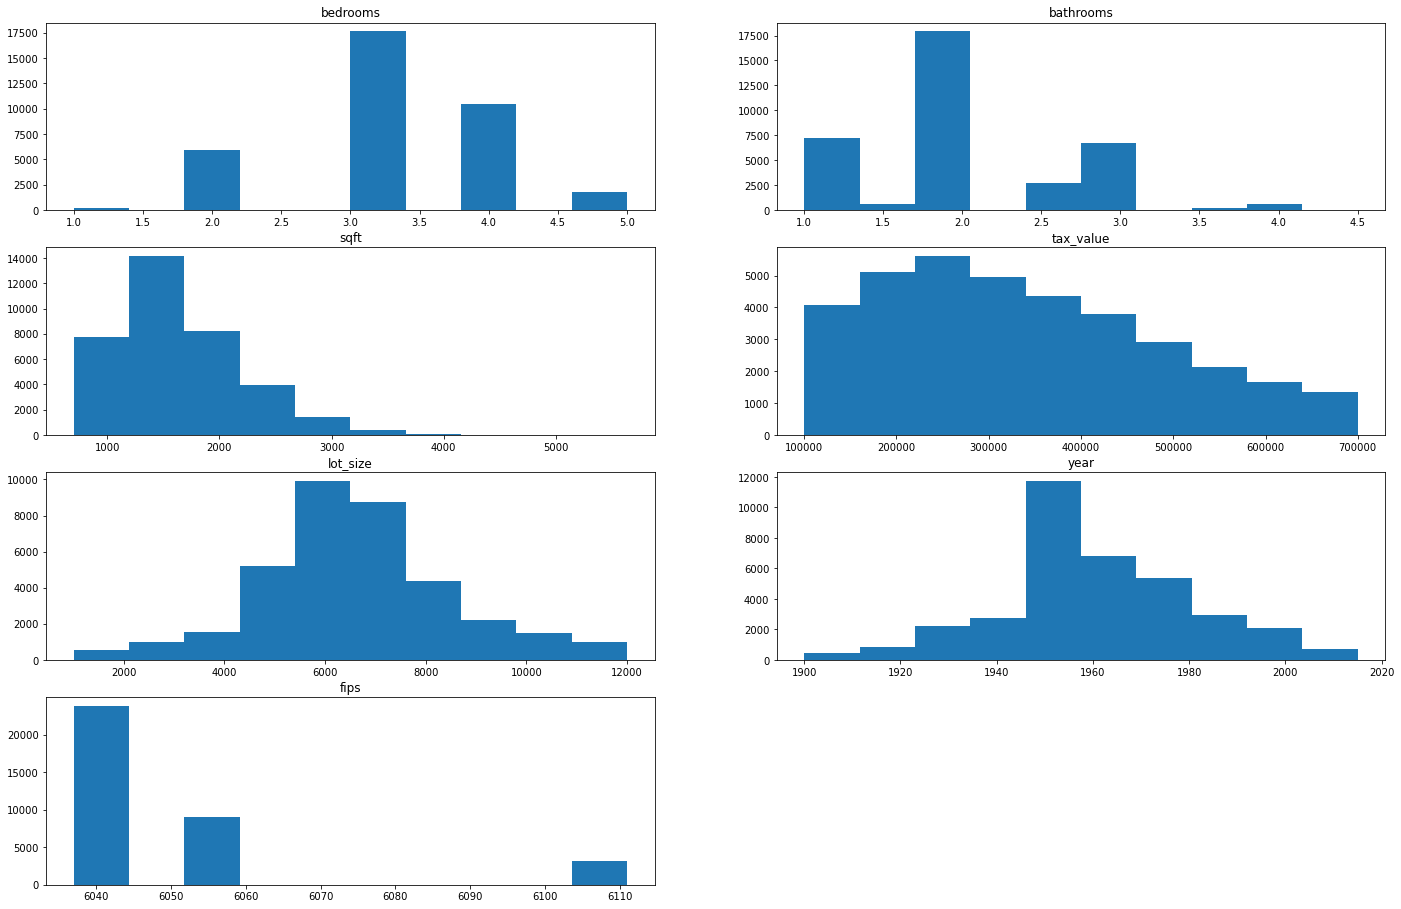

In [7]:
plot_variable_hist(df)

In [8]:
train, validate, test = wrangle.split_data(df)

In [9]:
def plot_variable_pairs(df):
    '''This function takes in a dataframe and returns a pairplot of variables with a red regression line.'''
    return sns.pairplot(df, kind='reg', corner=True, plot_kws={'line_kws':{'color':'red'}})

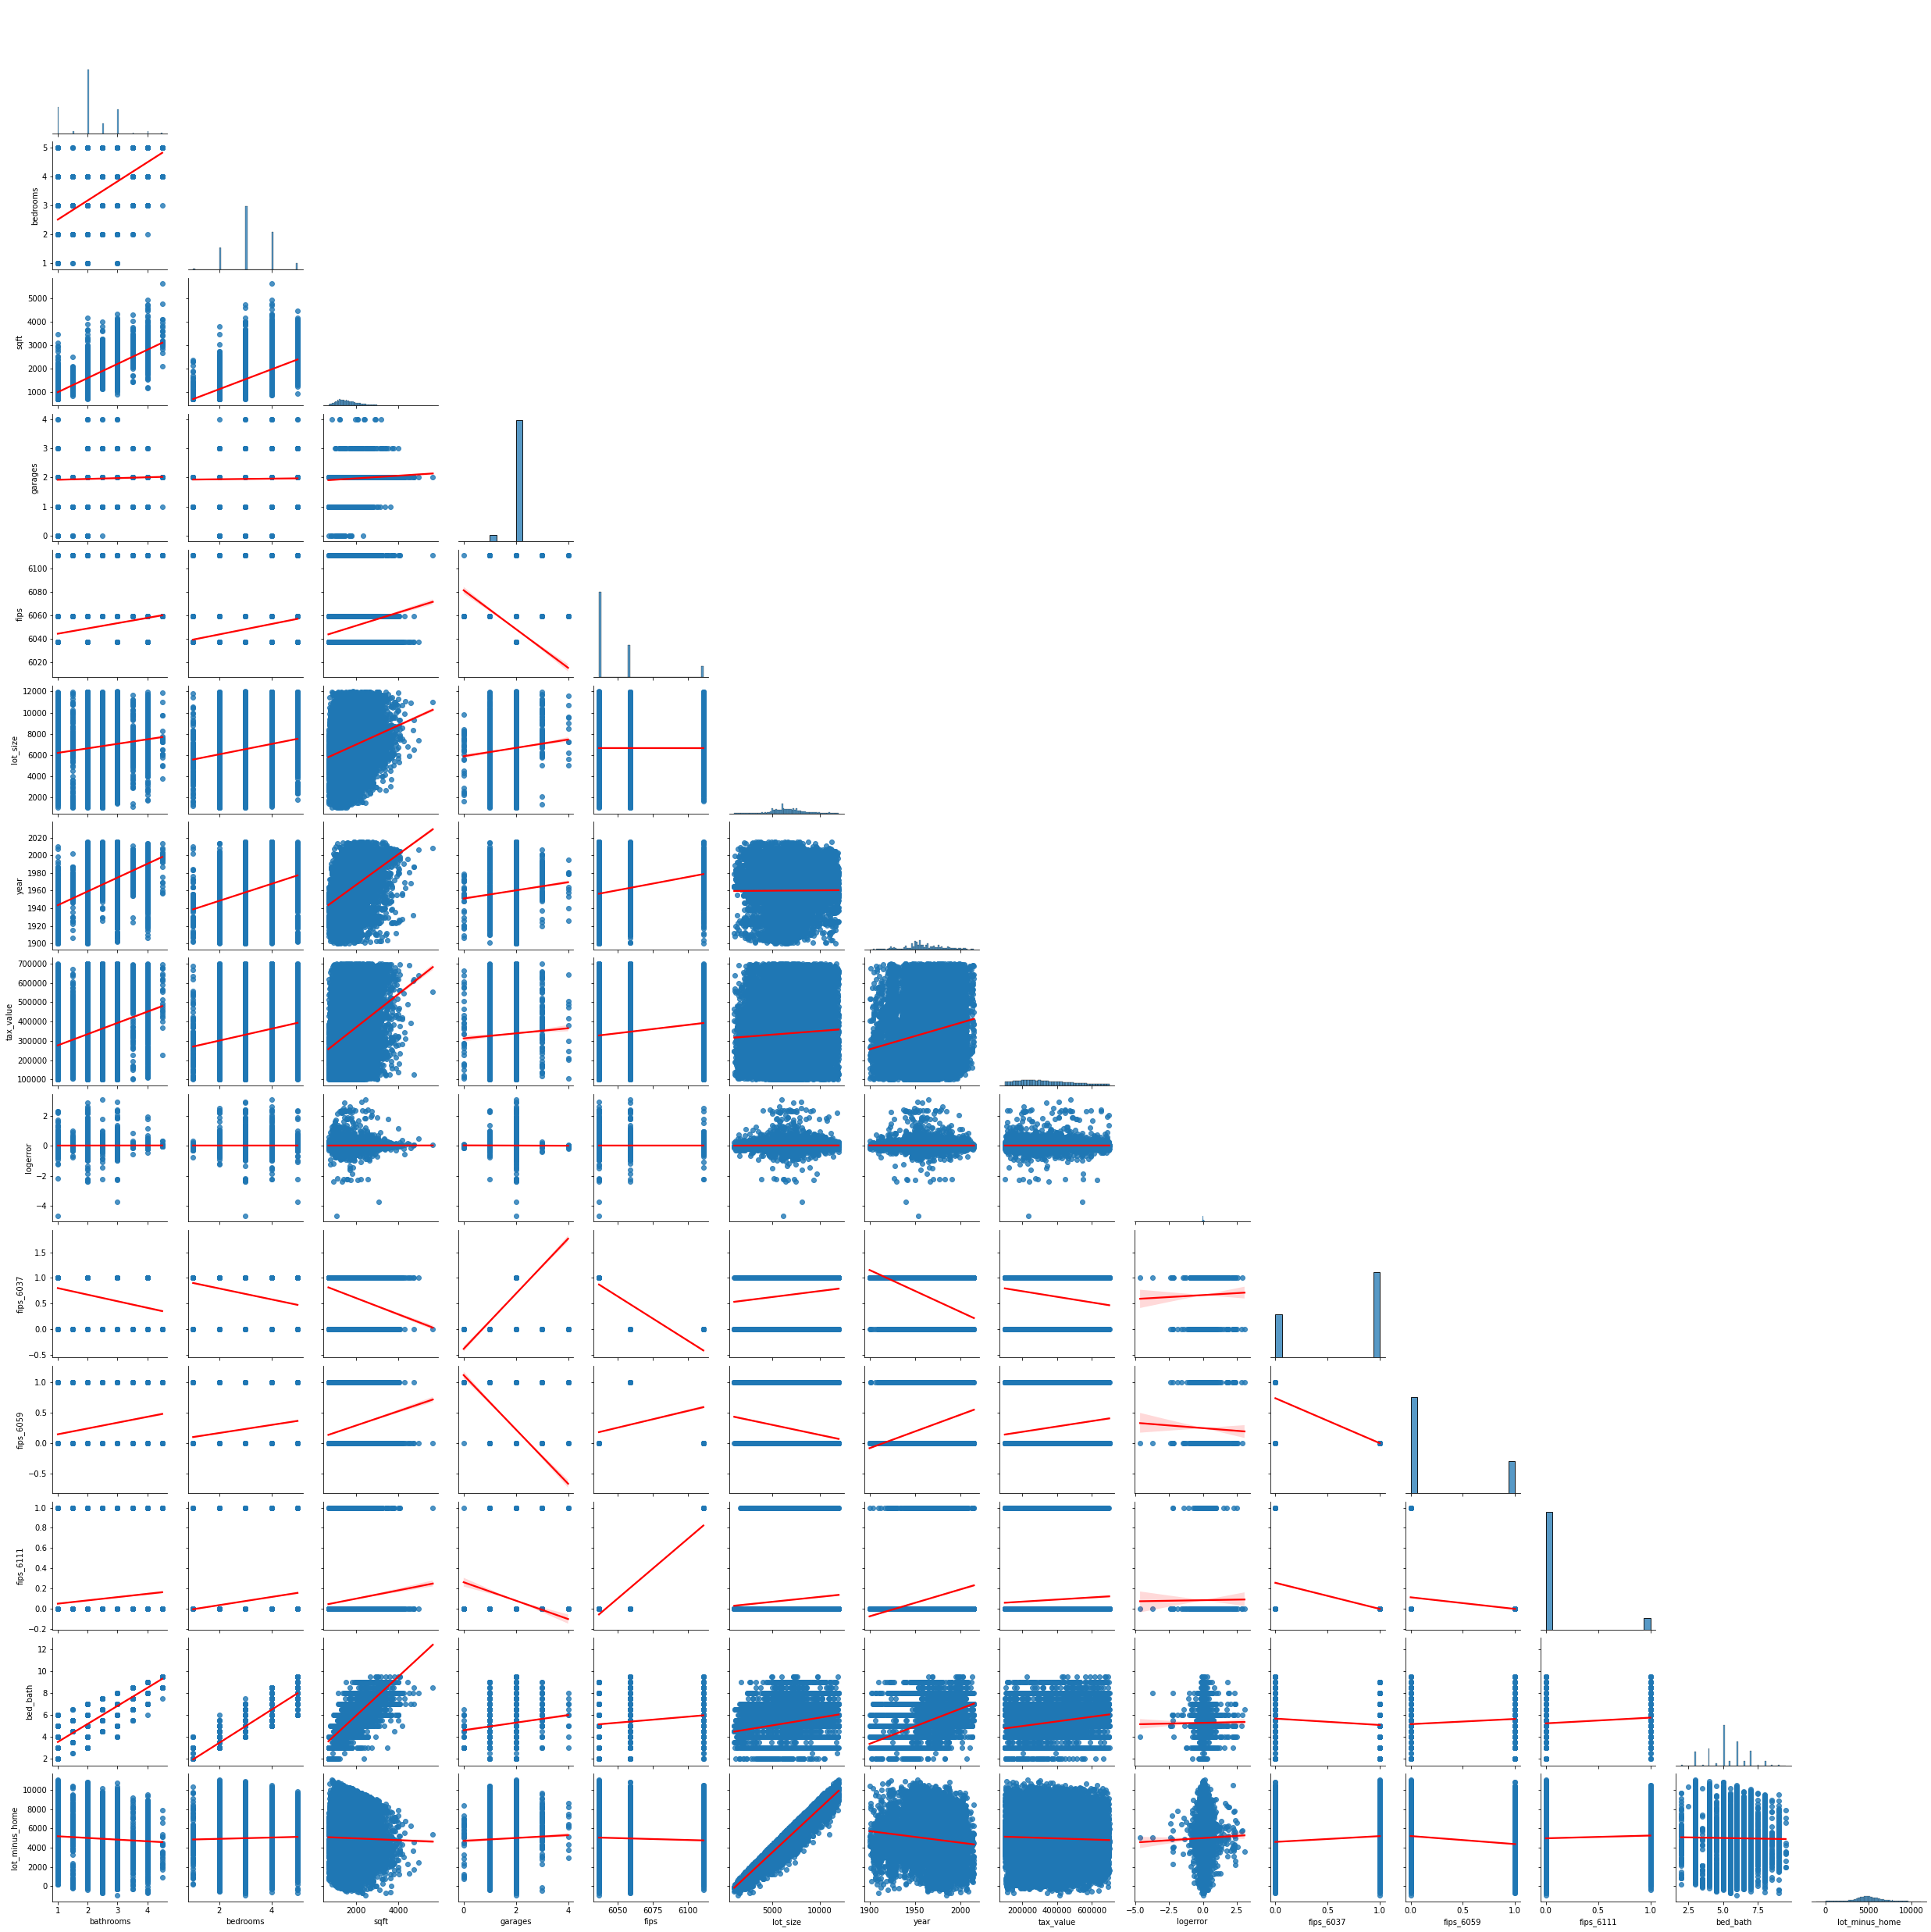

In [10]:
plot_variable_pairs(train)

In [26]:
def plot_vars(df):
    '''This function takes in a dataframe and returns visualizations for each discrete/continuous variable combination.'''
    # adjust figure size to make the charts easier to see
    plt.figure(figsize=[20,16])   
    # first subplot of 9, displayed as 3 rows and 3 columns
    plt.subplot(3,3,1)
    # enhanced boxplot with scatterpoints of outliers removed
    sns.boxenplot(x='bedrooms', y='tax_value', data=df, showfliers=False, palette='Blues')
    # red regression line overlayed on boxplot, extended to fit the entire x-axis
    sns.regplot(x='bedrooms', y='tax_value', data=df, truncate=False, scatter=False, color='red')
    # second subplot of 9, displayed as 3 rows and 3 columns
    plt.subplot(3,3,2)
    # enhanced boxplot with scatterpoints of outliers removed
    sns.boxenplot(x='bathrooms', y='tax_value', data=df, showfliers=False, palette='Blues')
    # red regression line overlayed on boxplot, extended to fit the entire x-axis
    sns.regplot(x='bathrooms', y='tax_value', data=df, truncate=False, scatter=False, color='red')
    # third subplot of 9, displayed as 3 rows and 3 columns
    plt.subplot(3,3,3)
    # lineplot is used for 'year' because it was the best visualization for this variable
    sns.lineplot(x='year', y='tax_value', data=df)
    # red regression line overlayed on boxplot, extended to fit the entire x-axis
    sns.regplot(x='year', y='tax_value', data=df, truncate=False, scatter=False, color='red')
    # the rest of the code is the same as above but the y-variables are changed
    plt.subplot(3,3,4)
    sns.boxenplot(x='bedrooms', y='lot_size', data=df, showfliers=False, palette='Blues')
    sns.regplot(x='bedrooms', y='lot_size', data=df, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,5)
    sns.boxenplot(x='bathrooms', y='lot_size', data=df, showfliers=False, palette='Blues')
    sns.regplot(x='bathrooms', y='lot_size', data=df, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,6)
    sns.lineplot(x='year', y='lot_size', data=df)
    sns.regplot(x='year', y='lot_size', data=df, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,7)
    sns.boxenplot(x='bedrooms', y='sqft', data=df, showfliers=False, palette='Blues')
    sns.regplot(x='bedrooms', y='sqft', data=df, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,8)
    sns.boxenplot(x='bathrooms', y='sqft', data=df, showfliers=False, palette='Blues')
    sns.regplot(x='bathrooms', y='sqft', data=df, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,9)
    sns.lineplot(x='year', y='sqft', data=df)
    sns.regplot(x='year', y='sqft', data=df, truncate=False, scatter=False, color='red')
    

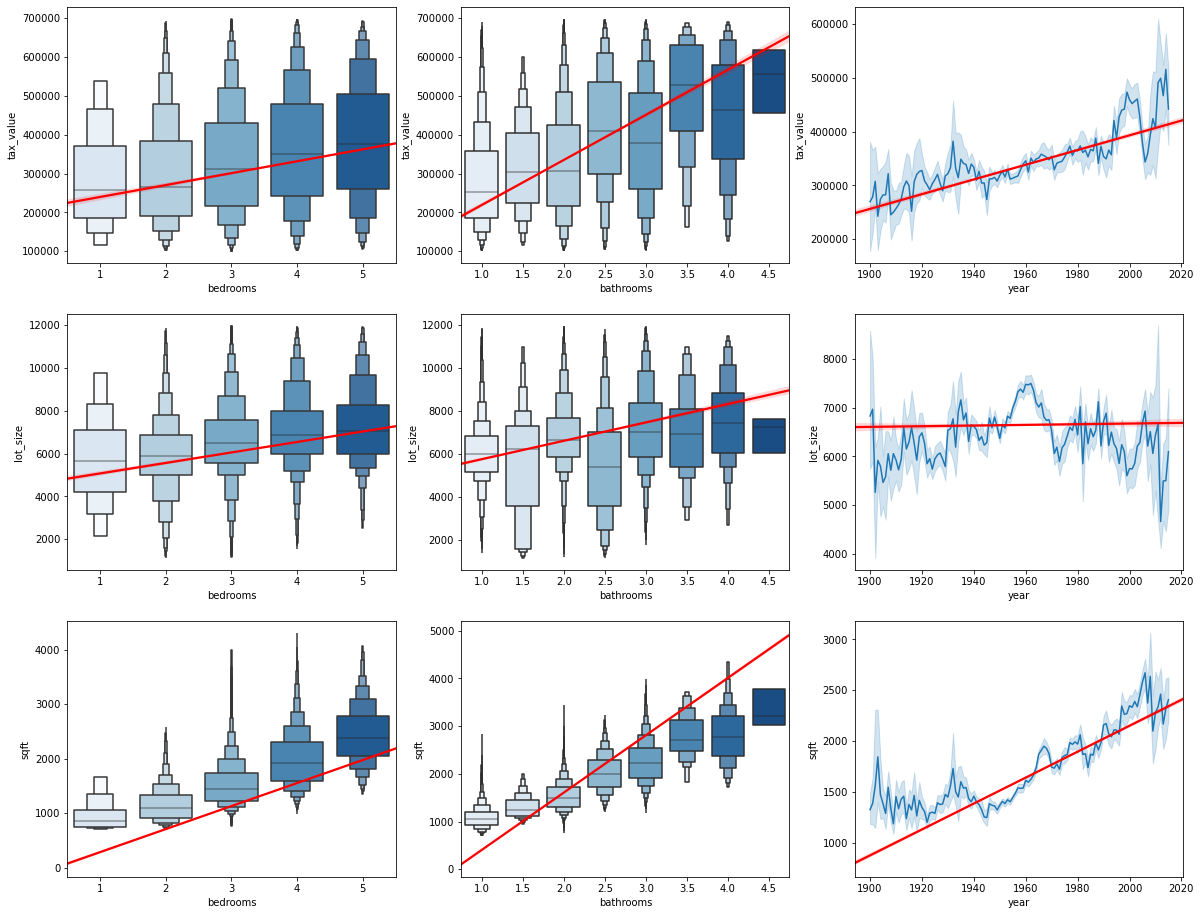

In [27]:
plot_vars(train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft', ylabel='tax_value'>

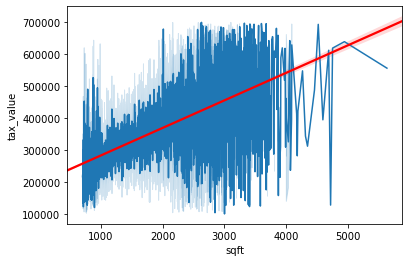

In [13]:
sns.lineplot(train.sqft, train.tax_value)
sns.regplot(x='sqft', y='tax_value', data=train, truncate=False, scatter=False, color='red')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lot_size', ylabel='tax_value'>

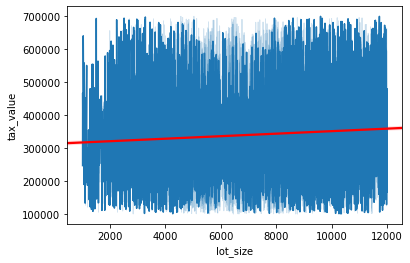

In [14]:
sns.lineplot(train.lot_size, train.tax_value)
sns.regplot(x='lot_size', y='tax_value', data=train, truncate=False, scatter=False, color='red')

<AxesSubplot:xlabel='year', ylabel='lot_size'>

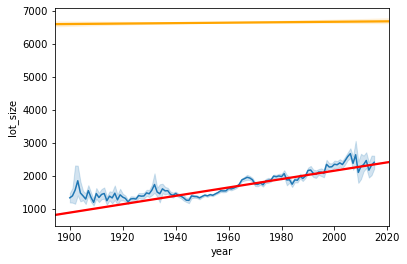

In [15]:
sns.lineplot(x='year', y='sqft', data=train)
sns.regplot(x='year', y='sqft', data=train, truncate=False, scatter=False, color='red')
sns.regplot(x='year', y='lot_size', data=train, truncate=False, scatter=False, color='orange')

In [68]:
def plot_time_vars(df):
    '''This function takes in a dataframe and returns visualizations for each discrete/continuous variable combination.'''
    # adjust figure size to make the charts easier to see
    plt.figure(figsize=[20,16])   
    # first subplot of 9, displayed as 3 rows and 3 columns
    plt.subplot(3,3,1)
    # lineplot is used for 'year' because it was the best visualization for this variable
    sns.lineplot(x='year', y='tax_value', data=df)
    # red regression line overlayed on boxplot, extended to fit the entire x-axis
    sns.regplot(x='year', y='tax_value', data=df, truncate=False, scatter=False, color='red')
    # label axes
    plt.xlabel('Year Built')
    plt.ylabel('Assessed Tax Value')
    # the rest of the code is the same as above but the y-variables are changed
    plt.subplot(3,3,2)
    sns.lineplot(x='year', y='lot_size', data=df)
    sns.regplot(x='year', y='lot_size', data=df, truncate=False, scatter=False, color='red')
    plt.xlabel('Year Built')
    plt.ylabel('Lot Size')
    plt.subplot(3,3,3)
    sns.lineplot(x='year', y='sqft', data=df)
    sns.regplot(x='year', y='sqft', data=df, truncate=False, scatter=False, color='red')
    plt.xlabel('Year Built')
    plt.ylabel('Size of Home in Square Feet')
    plt.subplot(3,3,4)
    sns.lineplot(x='year', y='lot_minus_home', data=df)
    sns.regplot(x='year', y='lot_minus_home', data=df, truncate=False, scatter=False, color='red')
    plt.xlabel('Year Built')
    plt.ylabel('Lot Size minus Home Size')
    plt.subplot(3,3,5)
    sns.lineplot(x='year', y='bed_bath', data=df)
    sns.regplot(x='year', y='bed_bath', data=df, truncate=False, scatter=False, color='red')
    plt.xlabel('Year Built')
    plt.ylabel('Bedrooms and Bathrooms')
    plt.subplot(3,3,6)
    sns.histplot(x='tax_value', hue='fips', data=df, palette="Blues", multiple="stack")
    plt.vlines(train.tax_value[train.fips_6037 == 1].mean(), ymin=0, ymax=1000, color='red', label='LA County')
    plt.vlines(train.tax_value[train.fips_6059 == 1].mean(), ymin=0, ymax=1000, color='green', label='Orange County')
    plt.vlines(train.tax_value[train.fips_6111 == 1].mean(), ymin=0, ymax=1000, color='orange', label='Ventura County')
    plt.xlabel('Assessed Tax Value: LA, Orange, Ventura Counties')
    plt.ylabel('Number of Homes')
    plt.legend()
    plt.suptitle('How have homes changed over the years? How have these changes affected tax value?', y=.92)

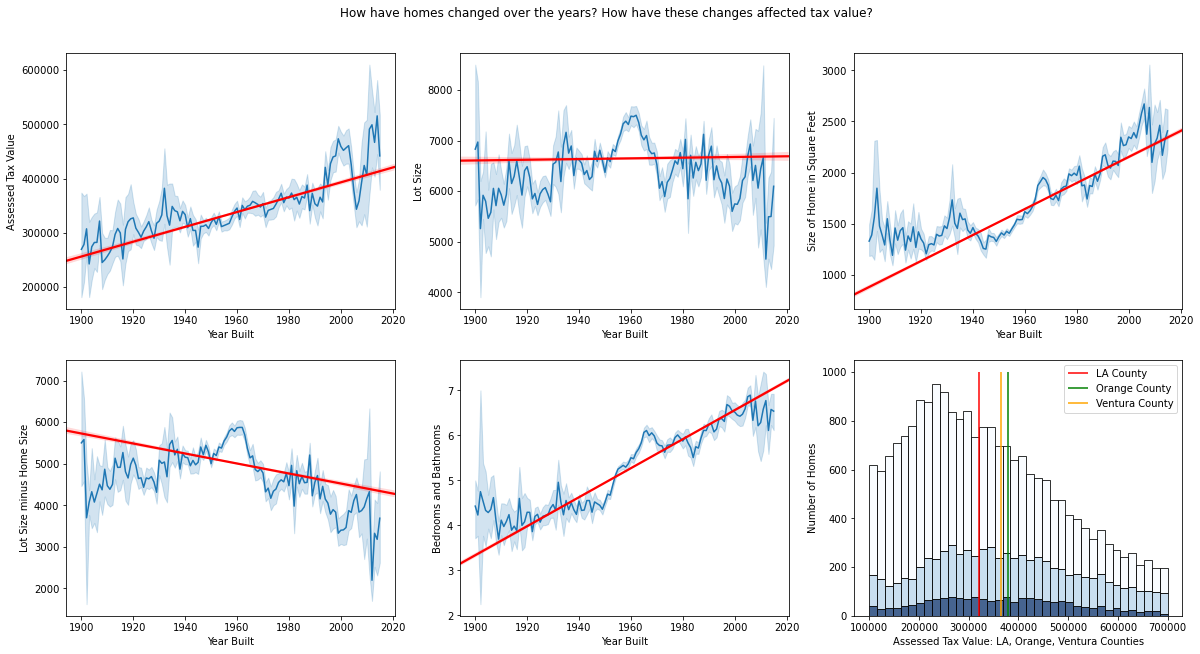

In [69]:
plot_time_vars(train)

<AxesSubplot:xlabel='tax_value', ylabel='lot_minus_home'>

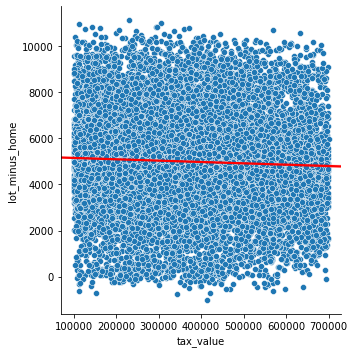

In [18]:
sns.relplot(x='tax_value', y='lot_minus_home', data=train)
sns.regplot(x='tax_value', y='lot_minus_home', data=train, truncate=False, scatter=False, color='red')

<AxesSubplot:xlabel='tax_value', ylabel='Count'>

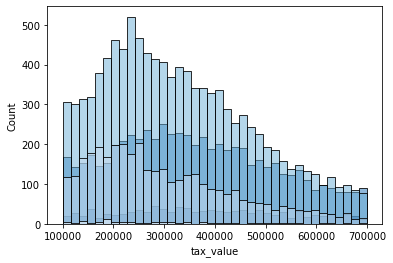

In [19]:
sns.histplot(x=train.tax_value, hue=train.bedrooms, multiple='layer', palette='Blues', legend=False)

<AxesSubplot:xlabel='tax_value', ylabel='Count'>

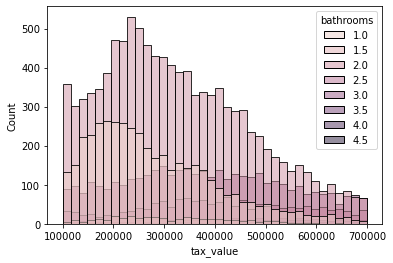

In [20]:
sns.histplot(x='tax_value', hue='bathrooms', data=train)

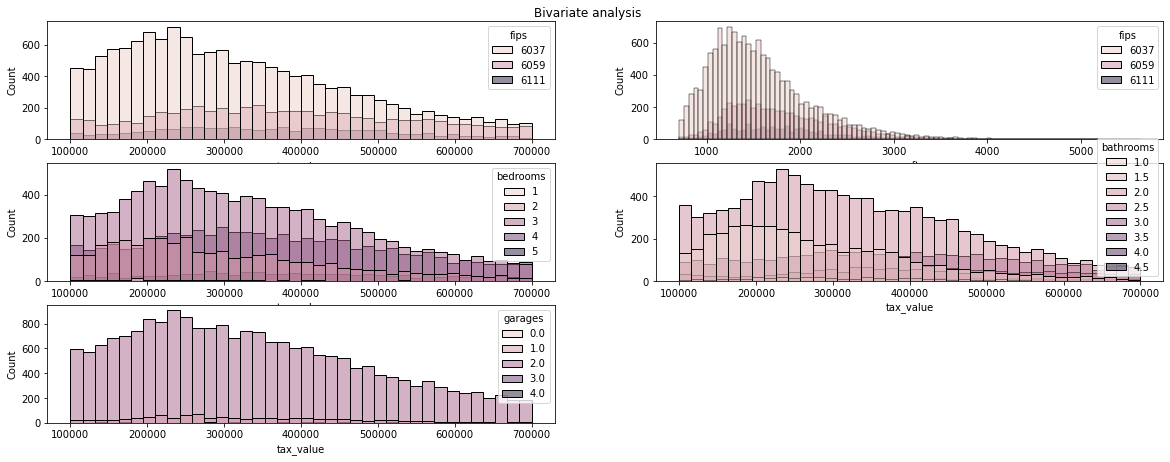

In [21]:
plt.figure(figsize=[20,10])
plt.subplot(421)
sns.histplot(x=train.tax_value, hue=train.fips)
plt.subplot(422)
sns.histplot(x=train.sqft, hue=train.fips)

plt.subplot(423)
sns.histplot(x=train.tax_value, hue=train.bedrooms)
plt.subplot(424)
sns.histplot(x='tax_value', hue='bathrooms', data=train)
plt.subplot(425)
sns.histplot(x='tax_value', hue='garages', data=train)


plt.suptitle('Bivariate analysis', y=.9)
plt.show()

In [71]:
a = train.tax_value[train.fips_6037 == 1].mean()
b = train.tax_value[train.fips_6059 == 1].mean()
c = train.tax_value[train.fips_6111 == 1].mean()
s = train.sample(5000)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
 

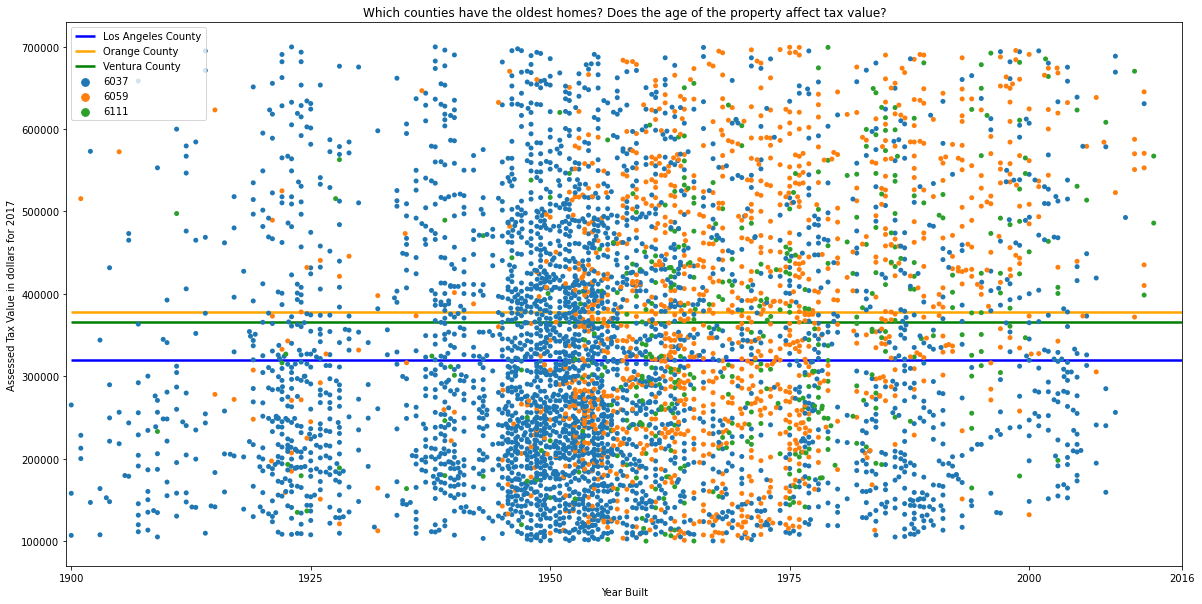

In [72]:
plt.figure(figsize=[20,10])
plt.hlines(a, xmin=[0], xmax=[116], color='blue', linewidths=2.5, label=('Los Angeles County'))
plt.hlines(b, xmin=[0], xmax=[116], color='orange', linewidths=2.5, label=('Orange County'))
plt.hlines(c, xmin=[0], xmax=[116], color='green', linewidths=2.5, label=('Ventura County'))
sns.swarmplot(s.year, s.tax_value, hue='fips', data=train)
plt.xticks([0, 25, 50, 75, 100, 116],['1900','1925','1950','1975','2000','2016'])
plt.xlabel('Year Built')
plt.ylabel('Assessed Tax Value in dollars for 2017')
plt.title('Which counties have the oldest homes? Does the age of the property affect tax value?')
plt.legend()
plt.show()

In [84]:
def mannwhit_test(x,y):
    alpha = 0.05
    stat, p = stats.mannwhitneyu(x,y)
    if p < alpha:
        print('We reject the null hypothesis.')
    else:
        print('We fail to reject the null hypothesis.')
    return stat, p

In [88]:
mannwhit_test(train.tax_value, train.sqft)

We reject the null hypothesis.


(465437476.0, 0.0)

In [89]:
mannwhit_test(train.sqft, train.lot_size)

We reject the null hypothesis.


(4063095.5, 0.0)

In [90]:
def corr_test(x,y):
    corr, p = stats.pearsonr(x,y)
    alpha = .05
    if p < alpha:
        print('We reject the null hypothesis.')
    else:
        print('We fail to reject the null hypothesis.')
    return corr, p

In [91]:
corr_test(train.sqft, train.tax_value)

We reject the null hypothesis.


(0.3212615397287776, 0.0)

In [92]:
corr_test(train.sqft, train.lot_size)

We reject the null hypothesis.


(0.26650526511439515, 0.0)

In [93]:
corr_test(train.tax_value, train.bathrooms)

We reject the null hypothesis.


(0.2727020454715549, 0.0)

In [96]:
def chi2_test(x,y):
    observed = pd.crosstab(x, y)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    alpha = .05
    print('Observed')
    print(observed.values)
    print('\nExpected')
    print(expected.astype(int))
    print('\n----')
    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p:.4f}')
    if p < alpha:
        print('We reject the null hypothesis.')
    else:
        print('We fail to reject the null hypothesis.')

In [97]:
chi2_test(train.bedrooms, train.bathrooms)

Observed
[[  84    2   15    0    4    0    0    0]
 [2346   56 1033   82   60    4    1    0]
 [1820  227 6592  713 1173   22   55    1]
 [  96   47 2898  732 2186   77  174   12]
 [   8    3  191   78  604   37  129   12]]

Expected
[[  21    1   52    7   19    0    1    0]
 [ 722   55 1781  266  668   23   59    4]
 [2139  164 5272  788 1979   68  176   12]
 [1255   96 3094  462 1161   40  103    7]
 [ 214   16  528   79  198    6   17    1]]

----
chi^2 = 10252.6769
p     = 0.0000
We reject the null hypothesis.


We reject the null hypothesis.


(465437476.0, 0.0)